Ostateczna analiza danych, ich kategoryzacja i pierwsze grupowanie tabeli

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
import scipy.stats as s
import pyodbc

In [2]:
# wczytujemy bestie i zeby nie miec problemu zamiany NewUserId na jakies 13123123e+14 itd, to ustalamy od razu typ danych
# w NewUserId na string
df = pd.read_csv('bestia.csv', dtype={'NewUserId': str})


In [3]:
pd.set_option('display.max_columns', None)
df

Unnamed: 0            ClientID  ContentID  AvgTimeOnPage  ViewsCount  \
0                 0  629835214461368392  0574C-77X          14435           1   
1                 1  629835214461368392  1072H-85X          10067           1   
2                 2  629835214461368392  1870I-99X          23176           1   
3                 3  629835214461368392  2899H-99X          11639           1   
4                 4  629835214461368392  4918B-87X          20549           1   
...             ...                 ...        ...            ...         ...   
8935202     9367646   99506894811688260  4966C-65X          18751           1   
8935203     9367647   99506894811688260  5577B-59X           4823           2   
8935204     9367648   99506894811688260  5577B-79X          14273           3   
8935205     9367649   99506894811688260  5577B-87X           6954           2   
8935206     9367650   99506894811688260  5622B-40X          69377           2   

         WasAddedToCart  WasBought  RecommendationClickCount  OpenSizeTab  \
0                 False      False                         0        False   
1                 False      False                         0        False   
2                 False      False                         0        False   
3                 False      False                         0        False   
4                 False      False                         0        False   
...                 ...        ...                       ...          ...   
8935202           False      False                         0        False   
8935203           False      False                         0        False   
8935204            True      False                         0        False   
8935205           False      False                         0        False   
8935206           False      False                         0        False   

         ChangeImage  AccordionExpand           NewUserId  RegisterFlag  \
0                  5                0  629835214461368392         False   
1                  4                0  629835214461368392         False   
2                 11                0  629835214461368392         False   
3                  4                0  629835214461368392         False   
4                  5                0  629835214461368392         False   
...              ...              ...                 ...           ...   
8935202            8                0             6884663          True   
8935203            3                0             6884663          True   
8935204           11                0             6884663          True   
8935205            5                0             6884663          True   
8935206            3                0             6884663          True   

                                Characteristic SaleStatus PriceCategory  \
0                                  długi rękaw       Sale           MIP   
1                                      płaszcz    Nonsale           HIP   
2                            midi, długi rękaw    Nonsale           MIP   
3                    mokasyny, skóra naturalna    Nonsale           MIP   
4         proste, luźne, high-waisted, dresowe    Nonsale           MIP   
...                                        ...        ...           ...   
8935202                    długi rękaw, gładka       Sale           HIP   
8935203                       chino, z paskiem    Nonsale           MIP   
8935204                       chino, z paskiem    Nonsale           MIP   
8935205                       chino, z paskiem    Nonsale           MIP   
8935206                           krótki rękaw       Sale           HIP   

                             AvSizes FashionLevel ItemSeason  SubclassID  \
0                 34, 36, 38, 40, 42    Core Wall    SS 2021        17.0   
1                        L, M, S, XL         Core    AW 2021       637.0   
2                        L, M, S, XS         Core    AW 2021       628.0   
3    

In [4]:
df.drop(['Unnamed: 0','ClientID','ContentID','AvSizes',"DepartmentID", "ColorGroup"],axis='columns', inplace=True)

In [5]:
pd.set_option('display.max_columns', None)
df

AvgTimeOnPage  ViewsCount  WasAddedToCart  WasBought  \
0                14435           1           False      False   
1                10067           1           False      False   
2                23176           1           False      False   
3                11639           1           False      False   
4                20549           1           False      False   
...                ...         ...             ...        ...   
8935202          18751           1           False      False   
8935203           4823           2           False      False   
8935204          14273           3            True      False   
8935205           6954           2           False      False   
8935206          69377           2           False      False   

         RecommendationClickCount  OpenSizeTab  ChangeImage  AccordionExpand  \
0                               0        False            5                0   
1                               0        False            4                0   
2                               0        False           11                0   
3                               0        False            4                0   
4                               0        False            5                0   
...                           ...          ...          ...              ...   
8935202                         0        False            8                0   
8935203                         0        False            3                0   
8935204                         0        False           11                0   
8935205                         0        False            5                0   
8935206                         0        False            3                0   

                  NewUserId  RegisterFlag  \
0        629835214461368392         False   
1        629835214461368392         False   
2        629835214461368392         False   
3        629835214461368392         False   
4        629835214461368392         False   
...                     ...           ...   
8935202             6884663          True   
8935203             6884663          True   
8935204             6884663          True   
8935205             6884663          True   
8935206             6884663          True   

                                Characteristic SaleStatus PriceCategory  \
0                                  długi rękaw       Sale           MIP   
1                                      płaszcz    Nonsale           HIP   
2                            midi, długi rękaw    Nonsale           MIP   
3                    mokasyny, skóra naturalna    Nonsale           MIP   
4         proste, luźne, high-waisted, dresowe    Nonsale           MIP   
...                                        ...        ...           ...   
8935202                    długi rękaw, gładka       Sale           HIP   
8935203                       chino, z paskiem    Nonsale           MIP   
8935204                       chino, z paskiem    Nonsale           MIP   
8935205                       chino, z paskiem    Nonsale           MIP   
8935206                           krótki rękaw       Sale           HIP   

        FashionLevel ItemSeason  SubclassID  ClassID DepartmentName AllSizes  \
0          Core Wall    SS 2021        17.0     11.0         ladies      NaN   
1               Core    AW 2021       637.0    184.0         ladies      NaN   
2               Core    AW 2021       628.0     15.0         ladies      NaN   
3               Base    AW 2021       108.0     37.0    accessories      NaN   
4         Bestseller    AW 2021        53.0     16.0         ladies      NaN   
...              ...        ...         ...      ...            ...      ...   
8935202         Core    SS 2021        15.0     11.0         ladies        M   
8935203   Bestseller    AW 2021        53.0     16.0         ladies        M   
8935204   Bestseller    AW 2021        53.0     16.0         ladies        M   
8935205   Bestseller    A

In [6]:
df.duplicated().sum()

16

In [7]:
df.duplicated(subset=df.loc[:, df.columns != 'NewUserId'].columns).sum()

24109

## AvgTimeOnPage 

In [8]:
mask = df['AvgTimeOnPage'] < 1000
df.loc[mask, 'AvgTimeOnPage'] = 0

In [9]:
df.AvgTimeOnPage.describe().round(2)

count    8935207.00
mean       28382.53
std        86039.24
min            0.00
25%         6562.00
50%        12996.00
75%        24454.00
max      6634272.00
Name: AvgTimeOnPage, dtype: float64

In [10]:
df['AvgTimeOnPage'] = df['AvgTimeOnPage'].div(1000).round(2)

In [11]:
df.AvgTimeOnPage.describe().round(2)

count    8935207.00
mean          28.38
std           86.04
min            0.00
25%            6.56
50%           13.00
75%           24.45
max         6634.27
Name: AvgTimeOnPage, dtype: float64

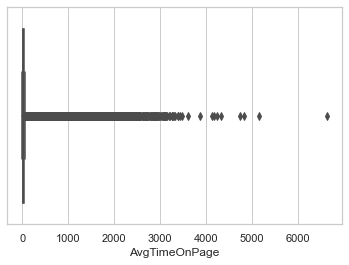

In [12]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['AvgTimeOnPage'])

In [13]:
(df['AvgTimeOnPage']>df['AvgTimeOnPage'].quantile(0.99)).sum()

89350

In [14]:
#a = df.loc[df['AvgTimeOnPage'] > df['AvgTimeOnPage'].quantile(0.99)].index 
#df = df.drop(a)

In [15]:
df.AvgTimeOnPage.describe().round(2)

count    8935207.00
mean          28.38
std           86.04
min            0.00
25%            6.56
50%           13.00
75%           24.45
max         6634.27
Name: AvgTimeOnPage, dtype: float64

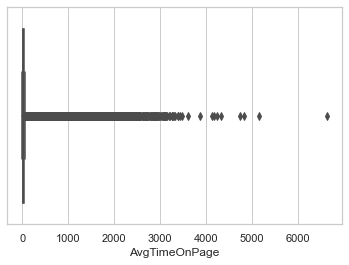

In [16]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['AvgTimeOnPage'])

### Kubełkowanie AvgTimeOnPage

In [17]:
df['AvgTimeOnPage'] = ['klikacz' if 6>=x else ('przecietny' if 30>=x else ('zainteresowany' if 60>=x else 'mysliciel')) for x in df.loc[:,'AvgTimeOnPage']]

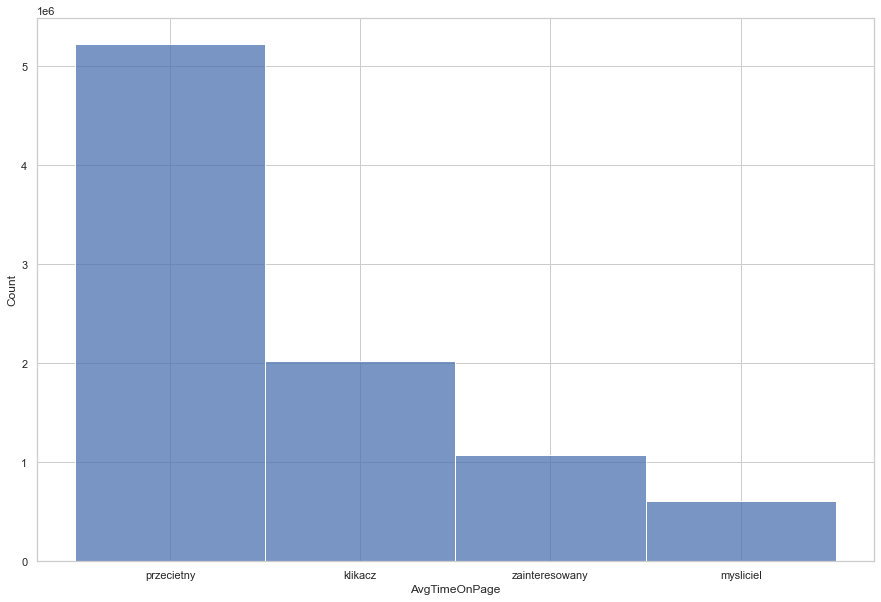

In [18]:
plt.figure(figsize=(15,10))
sns.histplot(df['AvgTimeOnPage'], bins=30);

<Figure size 1080x720 with 0 Axes>

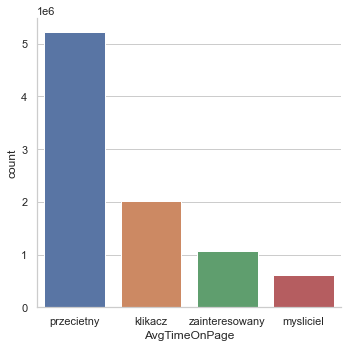

In [19]:
plt.figure(figsize=(15,10));
sns.catplot(x='AvgTimeOnPage', data=df, kind="count");

## ViewsCount

In [20]:
print(sorted(df['ViewsCount'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 132, 133, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 157, 158, 159, 160, 161, 163, 164, 166, 168, 171, 180, 181, 186, 188, 190, 196, 200, 201, 204, 207, 208, 209, 211, 222, 236, 238, 241, 242, 248, 253, 254, 255, 274, 293, 304, 322, 339, 344, 384, 403, 439]


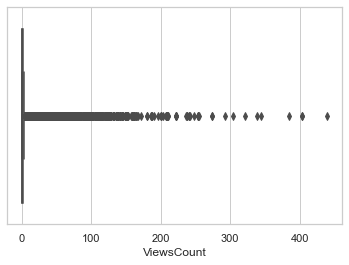

In [21]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['ViewsCount'])

In [22]:
(df['ViewsCount']>df['ViewsCount'].quantile(0.99)).sum()

66446

In [23]:
a = df.loc[df['ViewsCount'] > 200].index 
df = df.drop(a)

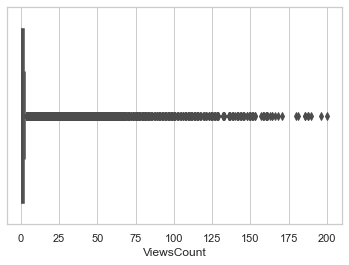

In [24]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['ViewsCount'])

In [25]:
df['ViewsCount'] = ['klikacz' if 2>x else ('przecietny' if 6>=x else 'mysliciel') for x in df.loc[:,'ViewsCount']]

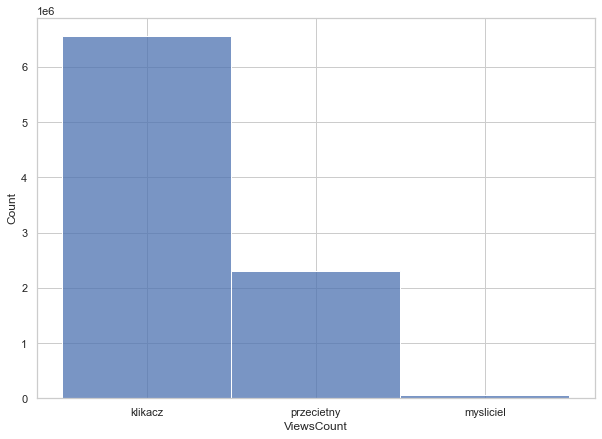

In [26]:
plt.figure(figsize=(10,7))
sns.histplot(df['ViewsCount'], bins=30);

<Figure size 1080x720 with 0 Axes>

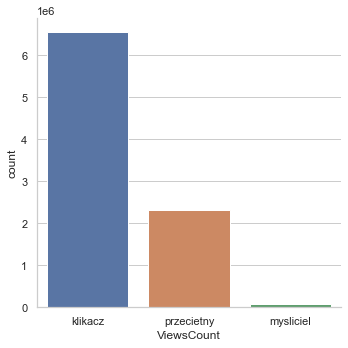

In [27]:
plt.figure(figsize=(15,10));
sns.catplot(x='ViewsCount', data=df, kind="count");

## WasAddedToCart

In [28]:
print(sorted(df['WasAddedToCart'].unique()))

[False, True]


In [29]:
df["WasAddedToCart"] = df["WasAddedToCart"].astype(int)

## WasBought

In [30]:
df["WasBought"] = df["WasBought"].astype(int)

## OpenSizeTab

In [31]:
df["OpenSizeTab"] = df["OpenSizeTab"].astype(int)

## RecommendationClickCount

In [32]:
print(sorted(df['RecommendationClickCount'].unique()))

[0, 1, 2]


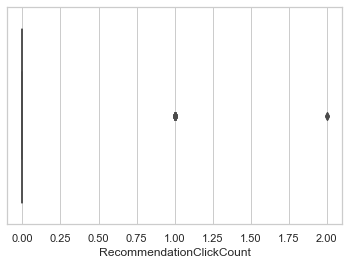

In [33]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['RecommendationClickCount'])

In [34]:
df.RecommendationClickCount.describe().round(2)

count    8935169.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            2.0
Name: RecommendationClickCount, dtype: float64

In [35]:
sum(df['RecommendationClickCount'] == 2)

2

In [36]:
sum(df['RecommendationClickCount'] == 1)

21

<Figure size 1080x720 with 0 Axes>

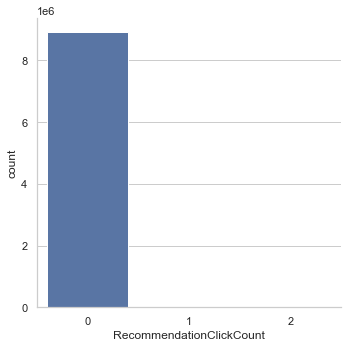

In [37]:
plt.figure(figsize=(15,10));
sns.catplot(x='RecommendationClickCount', data=df, kind="count");

In [38]:
df.drop(['RecommendationClickCount'],axis='columns', inplace=True)

## ChangeImage

In [39]:
print(sorted(df['ChangeImage'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 158, 159, 160, 162, 166, 167, 171, 173, 178, 179, 181, 183, 184, 185, 187, 188, 189, 191, 192, 194, 195, 197, 200, 204, 206, 208, 215, 224, 230, 235, 241, 244, 254, 258, 264, 275, 278, 287, 306, 317, 319, 331, 341, 367, 381, 438]


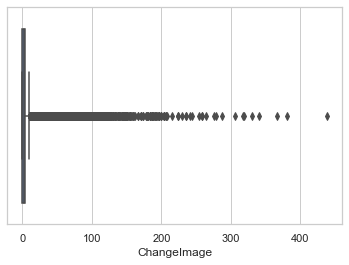

In [40]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['ChangeImage'])

In [41]:
df['ChangeImage'] = ['nieklikacz' if 1>x else ('przecietny' if 3>=x else 'mysliciel') for x in df.loc[:,'ChangeImage']]

<Figure size 1080x720 with 0 Axes>

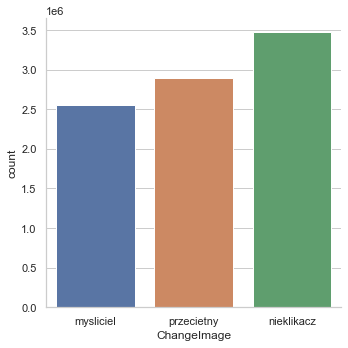

In [42]:
plt.figure(figsize=(15,10));
sns.catplot(x='ChangeImage', data=df, kind="count");

## AccordionExpand 

In [43]:
print(sorted(df['AccordionExpand'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 23, 25]


In [44]:
df['AccordionExpand'] = ['nieklikacz' if 1>x else 'klikacz' for x in df.loc[:,'AccordionExpand']]

<Figure size 1080x720 with 0 Axes>

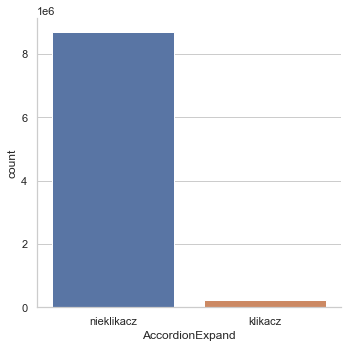

In [45]:
plt.figure(figsize=(15,10));
sns.catplot(x='AccordionExpand', data=df, kind="count");

## RegisterFlag 

In [46]:
df["RegisterFlag"] = df["RegisterFlag"].astype(int)

In [47]:
print(len(df['Characteristic'].unique()))

2475


## SaleStatus 

In [48]:
df['SaleStatus'] = [1 if 'Sale'==x else 0 for x in df.loc[:,'SaleStatus']]

## PriceCategory

In [49]:
df['LIP'] = [1 if 'LIP'==x else 0 for x in df.loc[:,'PriceCategory']]

In [50]:
df['MIP'] = [1 if 'MIP'==x else 0 for x in df.loc[:,'PriceCategory']]

In [51]:
df['HIP'] = [1 if 'HIP'==x else 0 for x in df.loc[:,'PriceCategory']]

In [52]:
df.drop(['PriceCategory'],axis='columns', inplace=True)

##  FashionLevel

In [53]:
print(df['FashionLevel'].unique())

['Core Wall' 'Core' 'Base' 'Bestseller' 'Basic' 'Core Floor' 'Directional'
 'Re-Act' 'Trend' nan 'Base+' 'Commercial' 'Continuous' 'Essential'
 'Standard' 'Direction']


In [54]:
basic=['Base','Basic','Base+','Standard','Commercial','Essential']
core=['Core Wall','Core','Core Floor']
direct=['Directional','Direction']
best=['Bestseller','Trend']
inne=['Re-Act','Continuous']

#df['DataFrame Column'] = df['DataFrame Column'].fillna(0)


In [55]:
df['FashionLevelSimple'] = ['basic' if x in basic else ('core' if x in core else ('direct' if x in direct else ('best' if x in best else ('inne' if x in inne else 'brak')))) for x in df.loc[:,'FashionLevel']]


In [56]:
df[df['FashionLevelSimple'].isna()]


Empty DataFrame
Columns: [AvgTimeOnPage, ViewsCount, WasAddedToCart, WasBought, OpenSizeTab, ChangeImage, AccordionExpand, NewUserId, RegisterFlag, Characteristic, SaleStatus, FashionLevel, ItemSeason, SubclassID, ClassID, DepartmentName, AllSizes, Child, S, M, L, Color, LIP, MIP, HIP, FashionLevelSimple]
Index: []

In [57]:
df['FashionLevelSimple'].unique()

array(['core', 'basic', 'best', 'direct', 'inne', 'brak'], dtype=object)

In [58]:
df.drop(['FashionLevel'],axis='columns', inplace=True)

In [59]:
df

AvgTimeOnPage  ViewsCount  WasAddedToCart  WasBought  OpenSizeTab  \
0          przecietny     klikacz               0          0            0   
1          przecietny     klikacz               0          0            0   
2          przecietny     klikacz               0          0            0   
3          przecietny     klikacz               0          0            0   
4          przecietny     klikacz               0          0            0   
...               ...         ...             ...        ...          ...   
8935202    przecietny     klikacz               0          0            0   
8935203       klikacz  przecietny               0          0            0   
8935204    przecietny  przecietny               1          0            0   
8935205    przecietny  przecietny               0          0            0   
8935206     mysliciel  przecietny               0          0            0   

        ChangeImage AccordionExpand           NewUserId  RegisterFlag  \
0         mysliciel      nieklikacz  629835214461368392             0   
1         mysliciel      nieklikacz  629835214461368392             0   
2         mysliciel      nieklikacz  629835214461368392             0   
3         mysliciel      nieklikacz  629835214461368392             0   
4         mysliciel      nieklikacz  629835214461368392             0   
...             ...             ...                 ...           ...   
8935202   mysliciel      nieklikacz             6884663             1   
8935203  przecietny      nieklikacz             6884663             1   
8935204   mysliciel      nieklikacz             6884663             1   
8935205   mysliciel      nieklikacz             6884663             1   
8935206  przecietny      nieklikacz             6884663             1   

                                Characteristic  SaleStatus ItemSeason  \
0                                  długi rękaw           1    SS 2021   
1                                      płaszcz           0    AW 2021   
2                            midi, długi rękaw           0    AW 2021   
3                    mokasyny, skóra naturalna           0    AW 2021   
4         proste, luźne, high-waisted, dresowe           0    AW 2021   
...                                        ...         ...        ...   
8935202                    długi rękaw, gładka           1    SS 2021   
8935203                       chino, z paskiem           0    AW 2021   
8935204                       chino, z paskiem           0    AW 2021   
8935205                       chino, z paskiem           0    AW 2021   
8935206                           krótki rękaw           1    SS 2021   

         SubclassID  ClassID DepartmentName AllSizes  Child  S  M  L  \
0              17.0     11.0         ladies      NaN      0  0  0  0   
1             637.0    184.0         ladies      NaN      0  0  0  0   
2             628.0     15.0         ladies      NaN      0  0  0  0   
3             108.0     37.0    accessories      NaN      0  0  0  0   
4              53.0     16.0         ladies      NaN      0  0  0  0   
...             ...      ...            ...      ...    ... .. .. ..   
8935202        15.0     11.0         ladies        M      0  1  1  1   
8935203        53.0     16.0         ladies        M      0  1  1  1   
8935204        53.0     16.0         ladies        M      0  1  1  1   
8935205        53.0     16.0         ladies        M      0  1  1  1   
8935206        36.0     15.0         ladies        M      0  1  1  1   

             Color  LIP  MIP  HIP FashionLevelSimple  
0          zielony    0    1    0               core  
1            szary    0    0    1               core  
2           czarny    0    1    0               core  
3           czarny    0    1    0              basic  
4          zielony    0    1    0               best  
...            ...  ...  ...  ...                ...  
8935202    zielony    0    0    1               core  
8935203  niebieski    0 

## ItemSeason

In [60]:
df['Season'] = df['ItemSeason'].astype(str).str[:2]

In [61]:
df.drop(['ItemSeason'],axis='columns', inplace=True)

In [62]:
df['ClassID'].nunique()

77

In [63]:
df.drop(['SubclassID'],axis='columns', inplace=True)

In [64]:
df

AvgTimeOnPage  ViewsCount  WasAddedToCart  WasBought  OpenSizeTab  \
0          przecietny     klikacz               0          0            0   
1          przecietny     klikacz               0          0            0   
2          przecietny     klikacz               0          0            0   
3          przecietny     klikacz               0          0            0   
4          przecietny     klikacz               0          0            0   
...               ...         ...             ...        ...          ...   
8935202    przecietny     klikacz               0          0            0   
8935203       klikacz  przecietny               0          0            0   
8935204    przecietny  przecietny               1          0            0   
8935205    przecietny  przecietny               0          0            0   
8935206     mysliciel  przecietny               0          0            0   

        ChangeImage AccordionExpand           NewUserId  RegisterFlag  \
0         mysliciel      nieklikacz  629835214461368392             0   
1         mysliciel      nieklikacz  629835214461368392             0   
2         mysliciel      nieklikacz  629835214461368392             0   
3         mysliciel      nieklikacz  629835214461368392             0   
4         mysliciel      nieklikacz  629835214461368392             0   
...             ...             ...                 ...           ...   
8935202   mysliciel      nieklikacz             6884663             1   
8935203  przecietny      nieklikacz             6884663             1   
8935204   mysliciel      nieklikacz             6884663             1   
8935205   mysliciel      nieklikacz             6884663             1   
8935206  przecietny      nieklikacz             6884663             1   

                                Characteristic  SaleStatus  ClassID  \
0                                  długi rękaw           1     11.0   
1                                      płaszcz           0    184.0   
2                            midi, długi rękaw           0     15.0   
3                    mokasyny, skóra naturalna           0     37.0   
4         proste, luźne, high-waisted, dresowe           0     16.0   
...                                        ...         ...      ...   
8935202                    długi rękaw, gładka           1     11.0   
8935203                       chino, z paskiem           0     16.0   
8935204                       chino, z paskiem           0     16.0   
8935205                       chino, z paskiem           0     16.0   
8935206                           krótki rękaw           1     15.0   

        DepartmentName AllSizes  Child  S  M  L      Color  LIP  MIP  HIP  \
0               ladies      NaN      0  0  0  0    zielony    0    1    0   
1               ladies      NaN      0  0  0  0      szary    0    0    1   
2               ladies      NaN      0  0  0  0     czarny    0    1    0   
3          accessories      NaN      0  0  0  0     czarny    0    1    0   
4               ladies      NaN      0  0  0  0    zielony    0    1    0   
...                ...      ...    ... .. .. ..        ...  ...  ...  ...   
8935202         ladies        M      0  1  1  1    zielony    0    0    1   
8935203         ladies        M      0  1  1  1  niebieski    0    1    0   
8935204         ladies        M      0  1  1  1    zielony    0    1    0   
8935205         ladies        M      0  1  1  1    zielony    0    1    0   
8935206         ladies        M      0  1  1  1     rozowy    0    0    1   

        FashionLevelSimple Season  
0                     core     SS  
1                     core     AW  
2                     core     AW  
3                    basic     AW  
4                     best     AW  
...                    ...    ...  
8935202               core     SS  
8935203               best     AW  
8935204               best     AW  
8935205               best     AW  
8935206               core     S

## Zamiana miejsc kolumn


In [65]:
cols = [ 'NewUserId',
         'AvgTimeOnPage',
         'ViewsCount',
         'WasAddedToCart',
         'WasBought',
         'OpenSizeTab',
         'ChangeImage',
         'AccordionExpand',
         'RegisterFlag',
         'Characteristic',
         'SaleStatus',
         'ClassID',
         'DepartmentName',
         'AllSizes',
         'Child',
         'S',
         'M',
         'L',
         'Color',
         'LIP',
         'MIP',
         'HIP',
         'FashionLevelSimple',
         'Season']

In [66]:
df = df[cols]
df

NewUserId AvgTimeOnPage  ViewsCount  WasAddedToCart  \
0        629835214461368392    przecietny     klikacz               0   
1        629835214461368392    przecietny     klikacz               0   
2        629835214461368392    przecietny     klikacz               0   
3        629835214461368392    przecietny     klikacz               0   
4        629835214461368392    przecietny     klikacz               0   
...                     ...           ...         ...             ...   
8935202             6884663    przecietny     klikacz               0   
8935203             6884663       klikacz  przecietny               0   
8935204             6884663    przecietny  przecietny               1   
8935205             6884663    przecietny  przecietny               0   
8935206             6884663     mysliciel  przecietny               0   

         WasBought  OpenSizeTab ChangeImage AccordionExpand  RegisterFlag  \
0                0            0   mysliciel      nieklikacz             0   
1                0            0   mysliciel      nieklikacz             0   
2                0            0   mysliciel      nieklikacz             0   
3                0            0   mysliciel      nieklikacz             0   
4                0            0   mysliciel      nieklikacz             0   
...            ...          ...         ...             ...           ...   
8935202          0            0   mysliciel      nieklikacz             1   
8935203          0            0  przecietny      nieklikacz             1   
8935204          0            0   mysliciel      nieklikacz             1   
8935205          0            0   mysliciel      nieklikacz             1   
8935206          0            0  przecietny      nieklikacz             1   

                                Characteristic  SaleStatus  ClassID  \
0                                  długi rękaw           1     11.0   
1                                      płaszcz           0    184.0   
2                            midi, długi rękaw           0     15.0   
3                    mokasyny, skóra naturalna           0     37.0   
4         proste, luźne, high-waisted, dresowe           0     16.0   
...                                        ...         ...      ...   
8935202                    długi rękaw, gładka           1     11.0   
8935203                       chino, z paskiem           0     16.0   
8935204                       chino, z paskiem           0     16.0   
8935205                       chino, z paskiem           0     16.0   
8935206                           krótki rękaw           1     15.0   

        DepartmentName AllSizes  Child  S  M  L      Color  LIP  MIP  HIP  \
0               ladies      NaN      0  0  0  0    zielony    0    1    0   
1               ladies      NaN      0  0  0  0      szary    0    0    1   
2               ladies      NaN      0  0  0  0     czarny    0    1    0   
3          accessories      NaN      0  0  0  0     czarny    0    1    0   
4               ladies      NaN      0  0  0  0    zielony    0    1    0   
...                ...      ...    ... .. .. ..        ...  ...  ...  ...   
8935202         ladies        M      0  1  1  1    zielony    0    0    1   
8935203         ladies        M      0  1  1  1  niebieski    0    1    0   
8935204         ladies        M      0  1  1  1    zielony    0    1    0   
8935205         ladies        M      0  1  1  1    zielony    0    1    0   
8935206         ladies        M      0  1  1  1     rozowy    0    0    1   

        FashionLevelSimple Season  
0                     core     SS  
1                     core     AW  
2                     core     AW  
3                    basic     AW  
4                     best     AW  
...                    ...    ...  
8935202               core     SS  
8935203               best     AW  
8935204               best     AW  
8935205               best     AW  
8935206               core     SS  

[8935

# grupowanie klientow

In [69]:
# zapisujemy Id klientow do tabelki
indeksy = df['NewUserId'].unique()
indeksy

array(['629835214461368392', '6156947', '6298370606872454516', ...,
       '995051316028061795', '995067112917890439', '99506800360300550'],
      dtype=object)

In [70]:
# mamy w Id jakies NaN :/
indeksy[1110610]

nan

In [72]:
# wierszy gdzie NewUserId jest NaN jest malo, to wywalamy je
df[df['NewUserId'].isnull()]


NewUserId   AvgTimeOnPage  ViewsCount  WasAddedToCart  WasBought  \
6739358       NaN       mysliciel     klikacz               0          0   
6739359       NaN  zainteresowany     klikacz               0          0   
6739360       NaN  zainteresowany     klikacz               0          0   
6739361       NaN       mysliciel  przecietny               0          0   
6739362       NaN      przecietny     klikacz               0          0   
6739363       NaN  zainteresowany  przecietny               0          0   
6739364       NaN      przecietny  przecietny               0          0   
6739365       NaN      przecietny     klikacz               0          0   
6739366       NaN      przecietny     klikacz               0          0   
6739367       NaN      przecietny     klikacz               0          0   
6739368       NaN         klikacz     klikacz               0          0   
6739369       NaN         klikacz     klikacz               0          0   

         OpenSizeTab ChangeImage AccordionExpand  RegisterFlag  \
6739358            0  przecietny      nieklikacz             1   
6739359            0  nieklikacz      nieklikacz             1   
6739360            0   mysliciel      nieklikacz             1   
6739361            0  przecietny      nieklikacz             1   
6739362            0  nieklikacz      nieklikacz             1   
6739363            0  przecietny      nieklikacz             1   
6739364            0   mysliciel      nieklikacz             1   
6739365            0  przecietny      nieklikacz             1   
6739366            0  nieklikacz      nieklikacz             1   
6739367            0  przecietny      nieklikacz             1   
6739368            0  nieklikacz      nieklikacz             1   
6739369            0  nieklikacz      nieklikacz             1   

                    Characteristic  SaleStatus  ClassID DepartmentName  \
6739358     luźne, na kant, jogger           1     16.0         ladies   
6739359     luźne, na kant, jogger           1     16.0         ladies   
6739360     luźne, na kant, jogger           1     16.0         ladies   
6739361   gładka, mini, bez rękawa           1     15.0         ladies   
6739362   gładka, mini, bez rękawa           1     15.0         ladies   
6739363                        NaN           1     15.0         ladies   
6739364   midi, gładka, bez rękawa           1     15.0         ladies   
6739365   gładka, midi, bez rękawa           1     15.0         ladies   
6739366   gładka, midi, bez rękawa           1     15.0         ladies   
6739367             boyfriend slim           1    183.0         ladies   
6739368                    sandały           1     37.0    accessories   
6739369          jeansowe, gładkie           1    183.0         ladies   

        AllSizes  Child  S  M  L      Color  LIP  MIP  HIP FashionLevelSimple  \
6739358      NaN      0  0  0  0      bialy    1    0    0              basic   
6739359      NaN      0  0  0  0  pastelowy    1    0    0              basic   
6739360      NaN      0  0  0  0  pastelowy    1    0    0              basic   
6739361      NaN      0  0  0  0  pastelowy    1    0    0               best   
6739362      NaN      0  0  0  0    zielony    1    0    0               best   
6739363      NaN      0  0  0  0       inne    1    0    0               best   
6739364      NaN      0  0  0  0  pastelowy    0    0    1               core   
6739365      NaN      0  0  0  0     rozowy    0    1    0               core   
6739366      NaN      0  0  0  0  pastelowy    0    1    0               core   
6739367      NaN      0  0  0  0  niebieski    0    1    0               best   
6739368      NaN      0  0  0  0  pastelowy    1    0    0               core   
6739369      NaN      0  0  0  0     czarny    1    0    0              basic   

        Season  
6739358     SS  
6739359     SS  
6739360     SS  
6739361     SS  
6739362     SS  
6739363     SS  
6739364     SS  
6739365

In [73]:
# usuwamy NaN
df = df[df['NewUserId'].notna()]


In [74]:
# sprawdzamy jeszcze raz czy na pewno nie ma NaN w Id
df[df['NewUserId'].isnull()]


Empty DataFrame
Columns: [NewUserId, AvgTimeOnPage, ViewsCount, WasAddedToCart, WasBought, OpenSizeTab, ChangeImage, AccordionExpand, RegisterFlag, Characteristic, SaleStatus, ClassID, DepartmentName, AllSizes, Child, S, M, L, Color, LIP, MIP, HIP, FashionLevelSimple, Season]
Index: []

In [75]:
# jeszcze raz tworzymy tabelke z NewUserId, tym razem bez NaN
indeksy = df['NewUserId'].unique()
indeksy

array(['629835214461368392', '6156947', '6298370606872454516', ...,
       '995051316028061795', '995067112917890439', '99506800360300550'],
      dtype=object)

In [76]:
# mamy 1455993 roznych klientow
df['NewUserId'].nunique()

1455993

In [77]:
# grupujemy sobie klientow (tuta wiersze to tylko pierwsze wiersze z grupy danego klienta, dalej wyswietlimy reszte)
gk = df.groupby('NewUserId')
gk.first()

AvgTimeOnPage  ViewsCount  WasAddedToCart  WasBought  \
NewUserId                                                                    
0                        przecietny     klikacz               0          0   
1000000320943821862  zainteresowany     klikacz               0          0   
1000007764117348950         klikacz  przecietny               0          0   
1000008142069520495         klikacz     klikacz               0          0   
1000009                  przecietny     klikacz               0          0   
...                             ...         ...             ...        ...   
9999743                  przecietny  przecietny               0          0   
9999751              zainteresowany     klikacz               0          0   
999981                    mysliciel  przecietny               0          0   
999984515464383645        mysliciel  przecietny               0          0   
9999923                  przecietny     klikacz               0          0   

                     OpenSizeTab ChangeImage AccordionExpand  RegisterFlag  \
NewUserId                                                                    
0                              0   mysliciel      nieklikacz             1   
1000000320943821862            0  nieklikacz      nieklikacz             0   
1000007764117348950            0  nieklikacz      nieklikacz             0   
1000008142069520495            0  przecietny      nieklikacz             0   
1000009                        0   mysliciel      nieklikacz             1   
...                          ...         ...             ...           ...   
9999743                        0   mysliciel      nieklikacz             1   
9999751                        0   mysliciel      nieklikacz             1   
999981                         0  przecietny      nieklikacz             1   
999984515464383645             0   mysliciel      nieklikacz             0   
9999923                        0  przecietny      nieklikacz             1   

                                                        Characteristic  \
NewUserId                                                                
0                                         midi, długi rękaw, wzorzysta   
1000000320943821862                            mini, gładka, rękaw 3/4   
1000007764117348950                                            gładkie   
1000008142069520495                                       midi, gładka   
1000009                                   kardigan, niezapinany, długi   
...                                                                ...   
9999743                                                       sportowe   
9999751                                         zapinana, jednorzędowa   
999981                body, bielizna, bawełna, z nadrukiem, krótki ...   
999984515464383645                                         niezapinany   
9999923                                większa niż a4, torebka shopper   

                     SaleStatus  ClassID DepartmentName AllSizes  Child  S  M  \
NewUserId                                                                       
0                             1     15.0         ladies     None      0  0  0   
1000000320943821862           1     15.0         ladies     None      0  0  0   
1000007764117348950           1    185.0         ladies     None      0  0  0   
1000008142069520495           0     12.0         ladies     None      0  0  0   
1000009                       0     12.0         ladies     None      0  0  0   
...                         ...      ...            ...      ...    ... .. ..   
9999743                       0    253.0           kids        L      1  0  1   
9999751                       1    190.0         ladies        S      0  1  0   
999981                        1     55.0           kids     None      0  0  0   
999984515464383645            1     12.0         ladies        S      0  1  1   
9999923                       0     37.0    accessories  

In [78]:
gk

In [79]:
# wyswietlamy sobie przykladowo klienta o Id 999981, widzimy np jak spedzal czas na roznych stronach produku, jakich produktow szukal
# patrzac na charekterystyki, w jakich depach sie poruszal, jakie kolory ogladal itd.
gk.get_group('999981')

NewUserId   AvgTimeOnPage  ViewsCount  WasAddedToCart  WasBought  \
409856    999981       mysliciel  przecietny               0          0   
409857    999981         klikacz     klikacz               0          0   
409858    999981  zainteresowany     klikacz               0          0   
409859    999981         klikacz     klikacz               0          0   
409860    999981      przecietny     klikacz               0          0   
409861    999981         klikacz     klikacz               0          0   
409862    999981      przecietny     klikacz               0          0   
409863    999981      przecietny     klikacz               0          0   
409864    999981      przecietny     klikacz               0          0   
409865    999981       mysliciel  przecietny               0          0   

        OpenSizeTab ChangeImage AccordionExpand  RegisterFlag  \
409856            0  przecietny      nieklikacz             1   
409857            0  nieklikacz      nieklikacz             1   
409858            0  przecietny      nieklikacz             1   
409859            0  nieklikacz      nieklikacz             1   
409860            0  nieklikacz      nieklikacz             1   
409861            0  nieklikacz      nieklikacz             1   
409862            0  nieklikacz      nieklikacz             1   
409863            0  nieklikacz      nieklikacz             1   
409864            0  nieklikacz      nieklikacz             1   
409865            0  nieklikacz      nieklikacz             1   

                                           Characteristic  SaleStatus  \
409856   body, bielizna, bawełna, z nadrukiem, krótki ...           1   
409857   body, bielizna, bawełna, z nadrukiem, krótki ...           1   
409858                                 dresowe, wzorzyste           1   
409859                   basic, z nadrukiem, krótki rękaw           1   
409860                                             kurtka           1   
409861                                 rajstopy, bielizna           1   
409862         skarpetki, bielizna, wielopak, z nadrukiem           1   
409863                                                NaN           1   
409864                                             czapka           1   
409865                                             kurtka           1   

        ClassID DepartmentName AllSizes  Child  S  M  L      Color  LIP  MIP  \
409856     55.0           kids      NaN      0  0  0  0      bialy    0    1   
409857     55.0           kids      NaN      0  0  0  0  pastelowy    0    1   
409858     52.0           kids      NaN      0  0  0  0  pastelowy    0    1   
409859     55.0           kids      NaN      0  0  0  0      bialy    1    0   
409860     53.0           kids      NaN      0  0  0  0      zolty    0    0   
409861     92.0           kids      NaN      0  0  0  0     rozowy    1    0   
409862     92.0           kids      NaN      0  0  0  0      bialy    0    1   
409863     92.0           kids      NaN      0  0  0  0      bialy    1    0   
409864    259.0           kids      NaN      0  0  0  0      zolty    1    0   
409865     53.0           kids      NaN      0  0  0  0     rozowy    0    0   

        HIP FashionLevelSimple Season  
409856    0               best     SS  
409857    0               best     SS  
409858    0              basic     SS  
409859    0              basic     SS  
409860    1              basic     SS  
409861    0               core     SS  
409862    0               core     SS  
409863    0               core     SS  
409864    0             direct     SS  
409865    1              basic     SS

In [80]:
# dla takiego klienta mozemy wyciagnac np liste charakterystyk
set(gk.get_group('999981')['Characteristic'].values.tolist())

{' basic, z nadrukiem, krótki rękaw',
 ' body, bielizna, bawełna, z nadrukiem, krótki rękaw',
 ' czapka',
 ' dresowe, wzorzyste',
 ' kurtka',
 ' rajstopy, bielizna',
 ' skarpetki, bielizna, wielopak, z nadrukiem',
 nan}

In [81]:
# lub kolorow, widzimy, ze ten klient szukal sobie jasnokolorowych ubran dzieciecych
set(gk.get_group('999981')['Color'].values.tolist())

{'bialy', 'pastelowy', 'rozowy', 'zolty'}

In [82]:
# tworzymy tabelke z nazwami kolumn, bedzie potrzebna do petli
kolumny=df.columns
kolumny

Index(['NewUserId', 'AvgTimeOnPage', 'ViewsCount', 'WasAddedToCart',
       'WasBought', 'OpenSizeTab', 'ChangeImage', 'AccordionExpand',
       'RegisterFlag', 'Characteristic', 'SaleStatus', 'ClassID',
       'DepartmentName', 'AllSizes', 'Child', 'S', 'M', 'L', 'Color', 'LIP',
       'MIP', 'HIP', 'FashionLevelSimple', 'Season'],
      dtype='object')

In [84]:
# szykujemy sobie pusta tabelke, do ktorej bedziemy wpisywac info o klientach, na poczatek wrzucamy tylko Id klientow
ostateczna = pd.DataFrame(indeksy, columns=["NewUserId"])
ostateczna[kolumny[1:]] = np.nan
ostateczna

NewUserId  AvgTimeOnPage  ViewsCount  WasAddedToCart  \
0         629835214461368392            NaN         NaN             NaN   
1                    6156947            NaN         NaN             NaN   
2        6298370606872454516            NaN         NaN             NaN   
3        6298374081547046372            NaN         NaN             NaN   
4                   23438869            NaN         NaN             NaN   
...                      ...            ...         ...             ...   
1455988             14563067            NaN         NaN             NaN   
1455989    99505086684061834            NaN         NaN             NaN   
1455990   995051316028061795            NaN         NaN             NaN   
1455991   995067112917890439            NaN         NaN             NaN   
1455992    99506800360300550            NaN         NaN             NaN   

         WasBought  OpenSizeTab  ChangeImage  AccordionExpand  RegisterFlag  \
0              NaN          NaN          NaN              NaN           NaN   
1              NaN          NaN          NaN              NaN           NaN   
2              NaN          NaN          NaN              NaN           NaN   
3              NaN          NaN          NaN              NaN           NaN   
4              NaN          NaN          NaN              NaN           NaN   
...            ...          ...          ...              ...           ...   
1455988        NaN          NaN          NaN              NaN           NaN   
1455989        NaN          NaN          NaN              NaN           NaN   
1455990        NaN          NaN          NaN              NaN           NaN   
1455991        NaN          NaN          NaN              NaN           NaN   
1455992        NaN          NaN          NaN              NaN           NaN   

         Characteristic  SaleStatus  ClassID  DepartmentName  AllSizes  Child  \
0                   NaN         NaN      NaN             NaN       NaN    NaN   
1                   NaN         NaN      NaN             NaN       NaN    NaN   
2                   NaN         NaN      NaN             NaN       NaN    NaN   
3                   NaN         NaN      NaN             NaN       NaN    NaN   
4                   NaN         NaN      NaN             NaN       NaN    NaN   
...                 ...         ...      ...             ...       ...    ...   
1455988             NaN         NaN      NaN             NaN       NaN    NaN   
1455989             NaN         NaN      NaN             NaN       NaN    NaN   
1455990             NaN         NaN      NaN             NaN       NaN    NaN   
1455991             NaN         NaN      NaN             NaN       NaN    NaN   
1455992             NaN         NaN      NaN             NaN       NaN    NaN   

          S   M   L  Color  LIP  MIP  HIP  FashionLevelSimple  Season  
0       NaN NaN NaN    NaN  NaN  NaN  NaN                 NaN     NaN  
1       NaN NaN NaN    NaN  NaN  NaN  NaN                 NaN     NaN  
2       NaN NaN NaN    NaN  NaN  NaN  NaN                 NaN     NaN  
3       NaN NaN NaN    NaN  NaN  NaN  NaN                 NaN     NaN  
4       NaN NaN NaN    NaN  NaN  NaN  NaN                 NaN     NaN  
...      ..  ..  ..    ...  ...  ...  ...                 ...     ...  
1455988 NaN NaN NaN    NaN  NaN  NaN  NaN                 NaN     NaN  
1455989 NaN NaN NaN    NaN  NaN  NaN  NaN                 NaN     NaN  
1455990 NaN NaN NaN    NaN  NaN  NaN  NaN                 NaN     NaN  
1455991 NaN NaN NaN    NaN  NaN  NaN  NaN                 NaN     NaN  
1455992 NaN NaN NaN    NaN  NaN  NaN  NaN                 NaN     NaN  

[1455993 rows x 24 columns]

In [85]:
# upewniamy sie, ze nie mamy pustego Id
ostateczna[ostateczna['NewUserId'].isnull()]


Empty DataFrame
Columns: [NewUserId, AvgTimeOnPage, ViewsCount, WasAddedToCart, WasBought, OpenSizeTab, ChangeImage, AccordionExpand, RegisterFlag, Characteristic, SaleStatus, ClassID, DepartmentName, AllSizes, Child, S, M, L, Color, LIP, MIP, HIP, FashionLevelSimple, Season]
Index: []

In [86]:
# zmieniamy typ kolumn na object, trzeba to zrobic zeby wpisywac w komorki listy
ostateczna[kolumny] = ostateczna[kolumny].astype(object)
ostateczna.dtypes

NewUserId             object
AvgTimeOnPage         object
ViewsCount            object
WasAddedToCart        object
WasBought             object
OpenSizeTab           object
ChangeImage           object
AccordionExpand       object
RegisterFlag          object
Characteristic        object
SaleStatus            object
ClassID               object
DepartmentName        object
AllSizes              object
Child                 object
S                     object
M                     object
L                     object
Color                 object
LIP                   object
MIP                   object
HIP                   object
FashionLevelSimple    object
Season                object
dtype: object

In [87]:
# zbijamy pionowo wszystko dla kazdego klienta
# to sie robi 35 minut okolo :<
for x in range(len(indeksy)):
    temp = gk.get_group(ostateczna['NewUserId'].loc[x])
    for k in kolumny[1:]:
        ostateczna.at[x,k]=[set(temp[k].values.tolist())]



In [88]:
# nie ma brakow, jestesmy happy :D i tylko 260MB <3
ostateczna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455993 entries, 0 to 1455992
Data columns (total 24 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   NewUserId           1455993 non-null  object
 1   AvgTimeOnPage       1455993 non-null  object
 2   ViewsCount          1455993 non-null  object
 3   WasAddedToCart      1455993 non-null  object
 4   WasBought           1455993 non-null  object
 5   OpenSizeTab         1455993 non-null  object
 6   ChangeImage         1455993 non-null  object
 7   AccordionExpand     1455993 non-null  object
 8   RegisterFlag        1455993 non-null  object
 9   Characteristic      1455993 non-null  object
 10  SaleStatus          1455993 non-null  object
 11  ClassID             1455993 non-null  object
 12  DepartmentName      1455993 non-null  object
 13  AllSizes            1455993 non-null  object
 14  Child               1455993 non-null  object
 15  S                   1455993 non-

In [89]:
ostateczna

NewUserId  \
0         629835214461368392   
1                    6156947   
2        6298370606872454516   
3        6298374081547046372   
4                   23438869   
...                      ...   
1455988             14563067   
1455989    99505086684061834   
1455990   995051316028061795   
1455991   995067112917890439   
1455992    99506800360300550   

                                             AvgTimeOnPage  \
0                           [{przecietny, zainteresowany}]   
1                                              [{klikacz}]   
2                                  [{przecietny, klikacz}]   
3                                       [{zainteresowany}]   
4                                  [{przecietny, klikacz}]   
...                                                    ...   
1455988  [{przecietny, mysliciel, klikacz, zainteresowa...   
1455989                                        [{klikacz}]   
1455990                                        [{klikacz}]   
1455991                                     [{przecietny}]   
1455992             [{klikacz, zainteresowany, mysliciel}]   

                      ViewsCount WasAddedToCart WasBought OpenSizeTab  \
0                    [{klikacz}]          [{0}]     [{0}]       [{0}]   
1                    [{klikacz}]          [{0}]     [{0}]       [{0}]   
2        [{przecietny, klikacz}]          [{0}]     [{0}]       [{0}]   
3                    [{klikacz}]          [{0}]     [{0}]       [{0}]   
4        [{przecietny, klikacz}]          [{0}]     [{0}]       [{0}]   
...                          ...            ...       ...         ...   
1455988  [{przecietny, klikacz}]       [{0, 1}]     [{0}]       [{0}]   
1455989              [{klikacz}]          [{0}]     [{0}]       [{0}]   
1455990              [{klikacz}]          [{0}]     [{0}]       [{0}]   
1455991              [{klikacz}]          [{0}]     [{0}]       [{0}]   
1455992              [{klikacz}]          [{0}]     [{0}]       [{0}]   

                                   ChangeImage AccordionExpand RegisterFlag  \
0                    [{przecietny, mysliciel}]  [{nieklikacz}]        [{0}]   
1                               [{przecietny}]  [{nieklikacz}]        [{1}]   
2        [{przecietny, mysliciel, nieklikacz}]  [{nieklikacz}]        [{0}]   
3                               [{nieklikacz}]  [{nieklikacz}]        [{0}]   
4        [{przecietny, mysliciel, nieklikacz}]  [{nieklikacz}]        [{1}]   
...                                        ...             ...          ...   
1455988  [{przecietny, mysliciel, nieklikacz}]  [{nieklikacz}]        [{1}]   
1455989                         [{nieklikacz}]  [{nieklikacz}]        [{0}]   
1455990                         [{przecietny}]  [{nieklikacz}]        [{0}]   
1455991                         [{przecietny}]  [{nieklikacz}]        [{0}]   
1455992              [{mysliciel, nieklikacz}]  [{nieklikacz}]        [{0}]   

                                            Characteristic SaleStatus  \
0        [{ midi, rękaw 3/4, wzorzysta,  gładka, bez rę...   [{0, 1}]   
1                                      [{ mom, high-rise}]      [{1}]   
2                [{ kurtka,  z nadrukiem,  slim mid rise}]   [{0, 1}]   
3                                 [{ jeansy, regular fit}]      [{1}]   
4        [{ luźne,  balloon,  high-waisted,  szerokie ,...   [{0, 1}]   
...                                                    ...        ...   
1455988  [{ wzorzysta, krótki rękaw,  mini, krótki ręka...   [{0, 1}]   
1455989                                [{ jeansowa, midi}]      [{1}]   
1455990                               [{ mini, wzorzysta}]      [{1}]   
1455991  [{ midi, długi rękaw, wzorzysta,  midi, rękaw ...      [{0}]   
1455992  [{ kardigan, niezapinany, długi,  midi, długi ...      [{0}]   

                                                   ClassID  \
0            [{37.0, 10.0, 11.0, 12.0, 15.0, 16.0, 184.0}]   
1                                                [{183.0}]   


In [95]:
# zapisujemy zeby nie przechodzic przez te meki jecze raz
ostateczna.to_csv(r'D:/tutaj/ostateczna.csv',index=True)


### Zresetowalem tu kernel bo mi ramu juz braklo
# Dalsza zabawa :D - Sebastian

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
import scipy.stats as s
import pyodbc

In [100]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('ostateczna.csv', dtype={'NewUserId': str})
df.drop(['Unnamed: 0'],axis='columns', inplace=True)
df

NewUserId  \
0         629835214461368392   
1                    6156947   
2        6298370606872454516   
3        6298374081547046372   
4                   23438869   
...                      ...   
1455988             14563067   
1455989    99505086684061834   
1455990   995051316028061795   
1455991   995067112917890439   
1455992    99506800360300550   

                                             AvgTimeOnPage  \
0                       [{'przecietny', 'zainteresowany'}]   
1                                            [{'klikacz'}]   
2                              [{'przecietny', 'klikacz'}]   
3                                     [{'zainteresowany'}]   
4                              [{'przecietny', 'klikacz'}]   
...                                                    ...   
1455988  [{'przecietny', 'mysliciel', 'klikacz', 'zaint...   
1455989                                      [{'klikacz'}]   
1455990                                      [{'klikacz'}]   
1455991                                   [{'przecietny'}]   
1455992       [{'klikacz', 'zainteresowany', 'mysliciel'}]   

                          ViewsCount WasAddedToCart WasBought OpenSizeTab  \
0                      [{'klikacz'}]          [{0}]     [{0}]       [{0}]   
1                      [{'klikacz'}]          [{0}]     [{0}]       [{0}]   
2        [{'przecietny', 'klikacz'}]          [{0}]     [{0}]       [{0}]   
3                      [{'klikacz'}]          [{0}]     [{0}]       [{0}]   
4        [{'przecietny', 'klikacz'}]          [{0}]     [{0}]       [{0}]   
...                              ...            ...       ...         ...   
1455988  [{'przecietny', 'klikacz'}]       [{0, 1}]     [{0}]       [{0}]   
1455989                [{'klikacz'}]          [{0}]     [{0}]       [{0}]   
1455990                [{'klikacz'}]          [{0}]     [{0}]       [{0}]   
1455991                [{'klikacz'}]          [{0}]     [{0}]       [{0}]   
1455992                [{'klikacz'}]          [{0}]     [{0}]       [{0}]   

                                         ChangeImage   AccordionExpand  \
0                      [{'przecietny', 'mysliciel'}]  [{'nieklikacz'}]   
1                                   [{'przecietny'}]  [{'nieklikacz'}]   
2        [{'przecietny', 'mysliciel', 'nieklikacz'}]  [{'nieklikacz'}]   
3                                   [{'nieklikacz'}]  [{'nieklikacz'}]   
4        [{'przecietny', 'mysliciel', 'nieklikacz'}]  [{'nieklikacz'}]   
...                                              ...               ...   
1455988  [{'przecietny', 'mysliciel', 'nieklikacz'}]  [{'nieklikacz'}]   
1455989                             [{'nieklikacz'}]  [{'nieklikacz'}]   
1455990                             [{'przecietny'}]  [{'nieklikacz'}]   
1455991                             [{'przecietny'}]  [{'nieklikacz'}]   
1455992                [{'mysliciel', 'nieklikacz'}]  [{'nieklikacz'}]   

        RegisterFlag                                     Characteristic  \
0              [{0}]  [{' midi, rękaw 3/4, wzorzysta', ' gładka, bez...   
1              [{1}]                              [{' mom, high-rise'}]   
2              [{0}]    [{' kurtka', ' z nadrukiem', ' slim mid rise'}]   
3              [{0}]                         [{' jeansy, regular fit'}]   
4              [{1}]  [{' luźne', ' balloon', ' high-waisted', ' sze...   
...              ...                                                ...   
1455988        [{1}]  [{' wzorzysta, krótki rękaw', ' mini, krótki r...   
1455989        [{0}]                              [{' jeansowa, midi'}]   
1455990        [{0}]                             [{' mini, wzorzysta'}]   
1455991        [{0}]  [{' midi, długi rękaw, wzorzysta', ' midi, ręk...   
1455992        [{0}]  [{' kardigan, niezapinany, długi', ' midi, dłu...   

        SaleStatus                                            ClassID  \
0         [{0, 1}]      [{37.0, 10.0, 11.0, 12.0, 15.0, 16.0, 184.0}]   
1            [{1}]          

In [101]:
df['Child'].unique()

array(['[{0}]', '[{1}]', '[{0, 1}]'], dtype=object)

In [102]:
df

NewUserId  \
0         629835214461368392   
1                    6156947   
2        6298370606872454516   
3        6298374081547046372   
4                   23438869   
...                      ...   
1455988             14563067   
1455989    99505086684061834   
1455990   995051316028061795   
1455991   995067112917890439   
1455992    99506800360300550   

                                             AvgTimeOnPage  \
0                       [{'przecietny', 'zainteresowany'}]   
1                                            [{'klikacz'}]   
2                              [{'przecietny', 'klikacz'}]   
3                                     [{'zainteresowany'}]   
4                              [{'przecietny', 'klikacz'}]   
...                                                    ...   
1455988  [{'przecietny', 'mysliciel', 'klikacz', 'zaint...   
1455989                                      [{'klikacz'}]   
1455990                                      [{'klikacz'}]   
1455991                                   [{'przecietny'}]   
1455992       [{'klikacz', 'zainteresowany', 'mysliciel'}]   

                          ViewsCount WasAddedToCart WasBought OpenSizeTab  \
0                      [{'klikacz'}]          [{0}]     [{0}]       [{0}]   
1                      [{'klikacz'}]          [{0}]     [{0}]       [{0}]   
2        [{'przecietny', 'klikacz'}]          [{0}]     [{0}]       [{0}]   
3                      [{'klikacz'}]          [{0}]     [{0}]       [{0}]   
4        [{'przecietny', 'klikacz'}]          [{0}]     [{0}]       [{0}]   
...                              ...            ...       ...         ...   
1455988  [{'przecietny', 'klikacz'}]       [{0, 1}]     [{0}]       [{0}]   
1455989                [{'klikacz'}]          [{0}]     [{0}]       [{0}]   
1455990                [{'klikacz'}]          [{0}]     [{0}]       [{0}]   
1455991                [{'klikacz'}]          [{0}]     [{0}]       [{0}]   
1455992                [{'klikacz'}]          [{0}]     [{0}]       [{0}]   

                                         ChangeImage   AccordionExpand  \
0                      [{'przecietny', 'mysliciel'}]  [{'nieklikacz'}]   
1                                   [{'przecietny'}]  [{'nieklikacz'}]   
2        [{'przecietny', 'mysliciel', 'nieklikacz'}]  [{'nieklikacz'}]   
3                                   [{'nieklikacz'}]  [{'nieklikacz'}]   
4        [{'przecietny', 'mysliciel', 'nieklikacz'}]  [{'nieklikacz'}]   
...                                              ...               ...   
1455988  [{'przecietny', 'mysliciel', 'nieklikacz'}]  [{'nieklikacz'}]   
1455989                             [{'nieklikacz'}]  [{'nieklikacz'}]   
1455990                             [{'przecietny'}]  [{'nieklikacz'}]   
1455991                             [{'przecietny'}]  [{'nieklikacz'}]   
1455992                [{'mysliciel', 'nieklikacz'}]  [{'nieklikacz'}]   

        RegisterFlag                                     Characteristic  \
0              [{0}]  [{' midi, rękaw 3/4, wzorzysta', ' gładka, bez...   
1              [{1}]                              [{' mom, high-rise'}]   
2              [{0}]    [{' kurtka', ' z nadrukiem', ' slim mid rise'}]   
3              [{0}]                         [{' jeansy, regular fit'}]   
4              [{1}]  [{' luźne', ' balloon', ' high-waisted', ' sze...   
...              ...                                                ...   
1455988        [{1}]  [{' wzorzysta, krótki rękaw', ' mini, krótki r...   
1455989        [{0}]                              [{' jeansowa, midi'}]   
1455990        [{0}]                             [{' mini, wzorzysta'}]   
1455991        [{0}]  [{' midi, długi rękaw, wzorzysta', ' midi, ręk...   
1455992        [{0}]  [{' kardigan, niezapinany, długi', ' midi, dłu...   

        SaleStatus                                            ClassID  \
0         [{0, 1}]      [{37.0, 10.0, 11.0, 12.0, 15.0, 16.0, 184.0}]   
1            [{1}]          

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455993 entries, 0 to 1455992
Data columns (total 24 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   NewUserId           1455993 non-null  object
 1   AvgTimeOnPage       1455993 non-null  object
 2   ViewsCount          1455993 non-null  object
 3   WasAddedToCart      1455993 non-null  object
 4   WasBought           1455993 non-null  object
 5   OpenSizeTab         1455993 non-null  object
 6   ChangeImage         1455993 non-null  object
 7   AccordionExpand     1455993 non-null  object
 8   RegisterFlag        1455993 non-null  object
 9   Characteristic      1455993 non-null  object
 10  SaleStatus          1455993 non-null  object
 11  ClassID             1455993 non-null  object
 12  DepartmentName      1455993 non-null  object
 13  AllSizes            1455993 non-null  object
 14  Child               1455993 non-null  object
 15  S                   1455993 non-

In [104]:
kolumny=df.columns
for i in kolumny:
    df[i]=df[i].apply(lambda x: x.replace('{',''))
    df[i]=df[i].apply(lambda x: x.replace('}',''))
    df[i]=df[i].apply(lambda x: x.replace('[',''))
    df[i]=df[i].apply(lambda x: x.replace(']',''))
    df[i]=df[i].apply(lambda x: x.replace("'",""))


In [105]:
df.describe().T

count   unique                                top  \
NewUserId           1455993  1455993                              43609   
AvgTimeOnPage       1455993       24                         przecietny   
ViewsCount          1455993        9                            klikacz   
WasAddedToCart      1455993        3                                  0   
WasBought           1455993        3                                  0   
OpenSizeTab         1455993        3                                  0   
ChangeImage         1455993        7  przecietny, mysliciel, nieklikacz   
AccordionExpand     1455993        3                         nieklikacz   
RegisterFlag        1455993        2                                  0   
Characteristic      1455993   568582                            gładkie   
SaleStatus          1455993        3                                  1   
ClassID             1455993   150423                               15.0   
DepartmentName      1455993       25                             ladies   
AllSizes            1455993       21                                nan   
Child               1455993        3                                  0   
S                   1455993        3                                  0   
M                   1455993        3                                  0   
L                   1455993        3                                  0   
Color               1455993     9120                             czarny   
LIP                 1455993        3                                  0   
MIP                 1455993        3                               0, 1   
HIP                 1455993        3                                  0   
FashionLevelSimple  1455993       85                               core   
Season              1455993        3                                 SS   

                       freq  
NewUserId                 1  
AvgTimeOnPage        354329  
ViewsCount           854035  
WasAddedToCart      1131690  
WasBought           1386312  
OpenSizeTab         1392172  
ChangeImage          346814  
AccordionExpand     1342879  
RegisterFlag        1029877  
Characteristic        20813  
SaleStatus           566032  
ClassID              203078  
DepartmentName       842892  
AllSizes            1095342  
Child               1312047  
S                   1287573  
M                   1264369  
L                   1335086  
Color                157157  
LIP                  748804  
MIP                  614362  
HIP                  756150  
FashionLevelSimple   421926  
Season               565839

In [ ]:
df['Child'] = [1 if x==1 else (0 if x==0 else 1 ) for x in df.loc[:,'Child']]
